In [2]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import pandas as pd
import numpy as np
import models.nestd
import os

from theanomodels.utils.misc import loadHDF5
import utils

Populating the interactive namespace from numpy and matplotlib


## Find files named 'config.json' and load them into a dataframe

In [23]:
configs = utils.extract_configs('output/002_10seeds/')
configs.iloc[:5]

,output/002_10seeds/ApproxM2/cw128_seed1,output/002_10seeds/ApproxM2/cw128_seed10,output/002_10seeds/ApproxM2/cw128_seed2,output/002_10seeds/ApproxM2/cw128_seed3,output/002_10seeds/ApproxM2/cw128_seed4,output/002_10seeds/ApproxM2/cw128_seed5,output/002_10seeds/ApproxM2/cw128_seed6,output/002_10seeds/ApproxM2/cw128_seed7,output/002_10seeds/ApproxM2/cw128_seed8,output/002_10seeds/ApproxM2/cw128_seed9,...,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed1,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed10,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed2,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed3,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed4,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed5,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed6,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed7,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed8,output/002_10seeds/STGumbelSoftmaxM2/cw128_seed9
KL_loggamma_coef,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
LogitNormalMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alpha_inference_layers,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
annealBP,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
annealBound,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## Get differences between runs

In [24]:
keys_that_are_different = []
keys_to_omit = ['timestamp']
for k in configs.index:
    if k not in keys_that_are_different:
        if (configs.T.duplicated(k,keep='first')==False).sum()>1:
            keys_that_are_different.append(k)

## Ignore list

In [26]:
configs = configs.loc[:,configs.loc['savedir'].str.contains('seed2')]

In [27]:
keys_that_are_different = []
keys_to_omit = ['timestamp']
for k in configs.index:
    if k not in keys_that_are_different:
        if (configs.T.duplicated(k,keep='first')==False).sum()>1:
            keys_that_are_different.append(k)

## Generate a name-mapping

In [29]:
keys_to_include = [
    'model',
    'sharpening',
]
defaults = {
    'sharpening': 1
}
remap_name = {
    'sharpening': 'shrp'
}

def generate_name(key,value):
    if key in remap_name:
        rkey = remap_name[key]
    else:
        rkey = key
    if value is None or value==False:
        return ''
    elif key in defaults and value==defaults[key]:
        return ''
    elif value==True:
        return rkey
    elif key=='model':
        return value
    else:
        return '%s=%s' % (rkey,value)
    
name_map = {}
for c in configs.columns:
    name = configs.loc[keys_to_include,c]
    name_str_list = filter(len,map(generate_name,*zip(*name.iteritems())))
    name = ' '.join(name_str_list)
    name_map[c] = name

In [30]:
name_map

{'output/002_10seeds/ApproxM2/cw128_seed2': u'ApproxM2',
 'output/002_10seeds/ExactM2/cw128_seed2': u'ExactM2',
 'output/002_10seeds/GumbelSoftmaxM2_sh3/cw128_sh3_seed2': u'GumbelSoftmaxM2 shrp=3.0',
 'output/002_10seeds/LogGamma/cw128_seed2': u'LogGamma',
 'output/002_10seeds/LogisticNormal/cw128_seed2': u'LogisticNormal',
 'output/002_10seeds/LogisticNormalM2/cw128_seed2': u'LogisticNormalM2',
 'output/002_10seeds/MLP/cw128_seed2': u'MLP',
 'output/002_10seeds/STGumbelSoftmaxM2/cw128_seed2': u'STGumbelSoftmaxM2'}

## Load results

In [31]:
results = models.nestd.NestD({name_map[k]:loadHDF5(os.path.join(k,'output.h5')) for k in name_map})

## Plotting Functions

In [33]:
def plot_result(x,y=None,label=None,title=None,best_val_func=None,best_val_format=None,**plt_kwargs): 
    if y is None:
        y = x
        x = np.arange(len(y))
    if label is not None and best_val_func is not None:
        best_val = best_val_format.format(best_val_func(y))
        label = '%s (%sep) %s' % (best_val,max(x),label)
    if label is not None:
        plt.plot(x,y,label=label,**plt_kwargs)
    else:
        plt.plot(x,y,**plt_kwargs)
        
def plot_parameters(legend_loc=None,xlim=None,ylim=None,xlabel=None,ylabel=None,**kwargs):
    if legend_loc is not None:
        plt.legend(**legend_loc)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    if ylim is not None:
        plt.ylim(*ylim)
    if xlim is not None:
        ply.xlim(*xlim)
        
        
def plot_experiment(results,keys=['accuracy','loss'],epoch_field='epoch',title=None,**kwargs):
    n = len(keys)
    plt.figure(figsize=(12,4),dpi=640)
    for i,k in enumerate(keys):
        plt.subplot(1,n,i+1)
        for s in results[:,k]:
            epochs = results[s,epoch_field]
            vals = results[s,k]
            plot_result(epochs,vals,label=s,**kwargs[k]['result_settings'])
        if title is None:
            plt.title(k)
        else:
            plt.title('%s\n%s' % (title,k))
        plot_parameters(**kwargs[k]['plot_parameters'])

## Plot Results

In [34]:
plot_settings = {
    'accuracy': {
        'result_settings': {
            'best_val_func': max,
            'best_val_format': '{:0.2f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'lower right'},
            'ylim':(0.5,1),
        }
    },
    'loss': {
        'result_settings': {
            'best_val_func': min,
            'best_val_format': '{:0.1f}',
        },
        'plot_parameters': {
            'legend_loc': {'loc':'upper right'},
        }
    },
    
}

In [35]:
seaborn.set_palette(seaborn.color_palette("hls", len(results)))

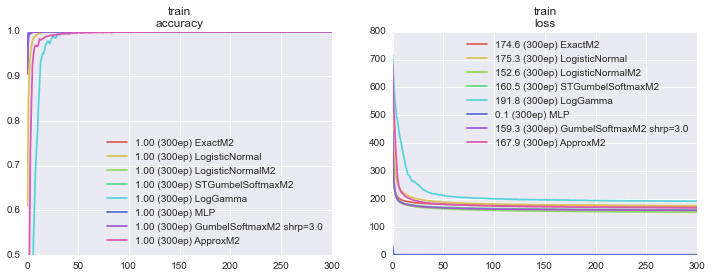

In [36]:
plot_experiment(results[:,'train'],title='train',**plot_settings)

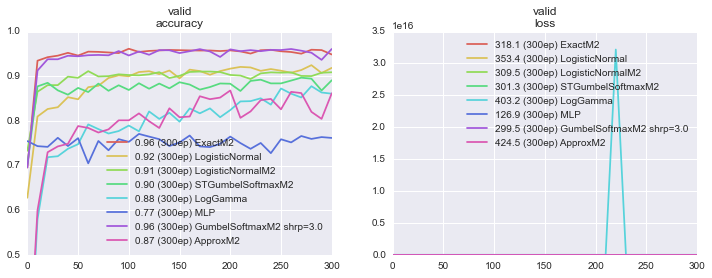

In [37]:
plot_experiment(results[:,'valid'],title='valid',**plot_settings)

## KL_Z: load mu & logcov2 from output_verbose

In [40]:
import h5py

In [41]:
def applyfunc(d):
    if isinstance(d,h5py.Group):
        return models.nestd.NestD(d).apply(applyfunc)
    else:
        return d

def load_mu_logcov2(filepath):
    with h5py.File(filepath,'r') as f:
        return models.nestd.NestD(f).apply(applyfunc)[:,:,['mu','logcov2']].apply(np.array)

def load_y(filepath):
    with h5py.File(filepath,'r') as f:
        return models.nestd.NestD(f).apply(applyfunc)[:,:,['y']].apply(np.array)
    
results_mu_logcov = models.nestd.NestD({name_map[k]:load_mu_logcov2(os.path.join(k,'output_verbose.h5')) for k in name_map})

## KL_Z: Calculate KL

In [43]:
def find_and_apply(x,findfunc,applyfunc):
    if isinstance(x,models.nestd.NestD):
        if findfunc(x):
            return applyfunc(x)
        else:
            y = models.nestd.NestD()
            for k in x:
                y[k] = find_and_apply(x[k],findfunc,applyfunc)
            return y
    else:
        return x

def gaussian_kl(mu,logcov2):
    return models.nestd.NestD({'KL':0.5*(np.exp(logcov2)+mu**2.0-1.0-logcov2)})

find_keys = ['mu','logcov2']
results_KL = find_and_apply(results_mu_logcov,
                            findfunc=lambda x: all([k in x for k in find_keys]),
                            applyfunc=lambda x: {k:x[k] for k in find_keys}).apply(lambda x: gaussian_kl(**x))


## KL_Z: plot the KL divergence at each latent Z node over iterations

In [45]:
def plot_KL_heatmap(data,title=None,xticks=None,figsize=(18,5)):
    plt.figure(1,figsize=figsize)
    plt.pcolor(data.T,cmap='jet')
    plt.xlim(0,data.shape[0])
    plt.ylim(0,data.shape[1])
    if xticks is not None:
        plt.xticks(xticks)
    if title is not None:
        plt.title(title)
    plt.xlabel('examples ordered by iteration #')
    plt.ylabel('Z index')

/Users/justinmaojones/.virtualenvs/env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


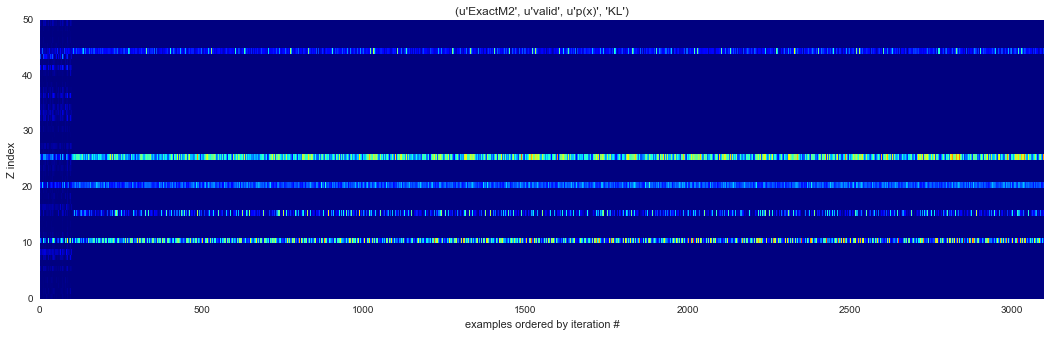

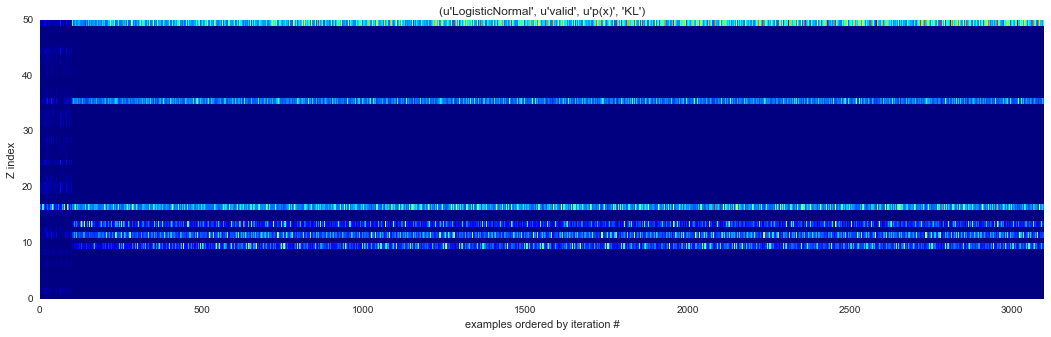

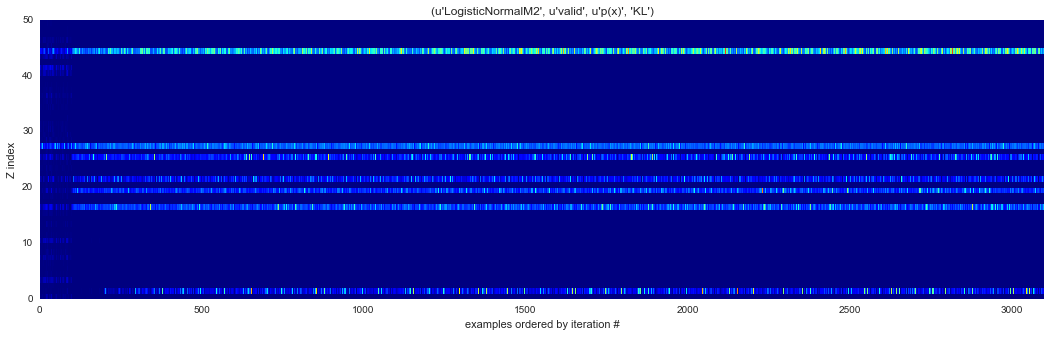

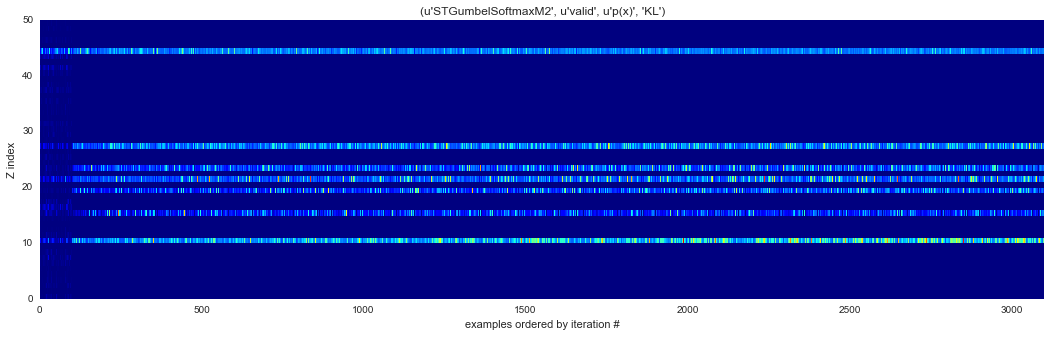

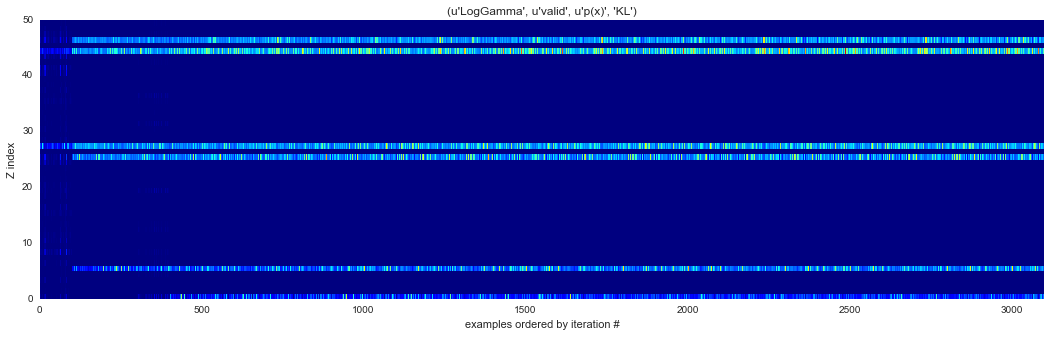

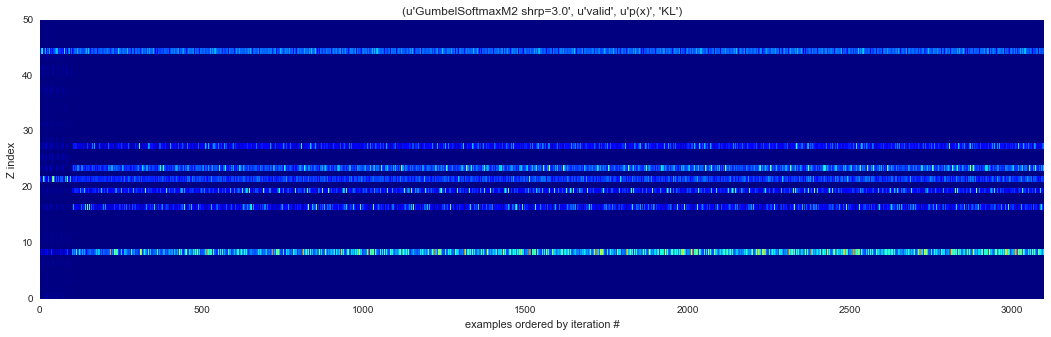

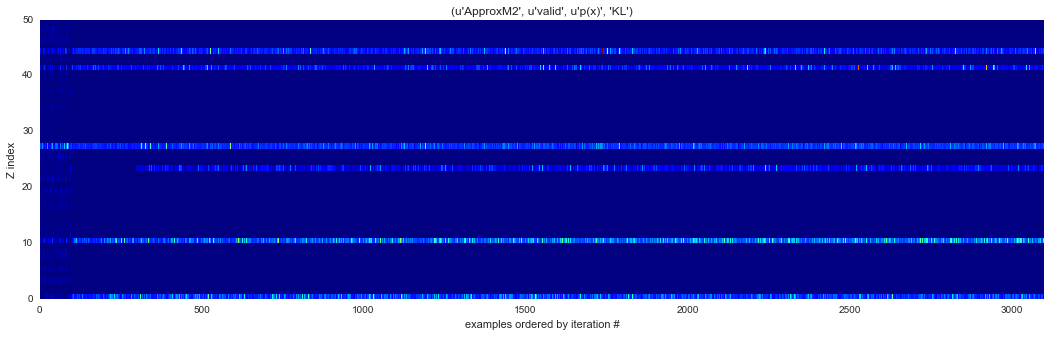

In [46]:
for kl_name,kl in list(results_KL[:,['valid'],['p(x)']].walk()):
    plot_KL_heatmap(kl,kl_name)
    plt.show()